In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from glob import glob
import os
import h5py

In [2]:
archive = h5py.File('data/kepler_lcs/archive.hdf5', 'w')

In [3]:
dirs = glob('data/kepler_lcs/?????????')

In [6]:
for directory in dirs: 
    kepid = directory.split(os.sep)[-1]
    if kepid not in archive: 
        t = []
        f = []
        for path in glob(os.path.join(directory, '*.fits')):
            try: 
                fitsfile = fits.getdata(path)
                not_nan = ~np.isnan(fitsfile['TIME']) & ~np.isnan(fitsfile['PDCSAP_FLUX'])
                t.append(fitsfile['TIME'][not_nan] + 2454833)
                f.append(fitsfile['PDCSAP_FLUX'][not_nan] / np.median(fitsfile['PDCSAP_FLUX'][not_nan]))
            except TypeError:
                pass

        t = np.concatenate(t)
        f = np.concatenate(f)
        archive.create_dataset(kepid, data=np.vstack([t, f]), compression='lzf')

#         plt.plot(t, f)
#         plt.show()

In [7]:
archive.close()

In [8]:

archive = h5py.File('data/kepler_lcs/archive.hdf5', 'r')

In [9]:
t, f = archive['002162635'][:]

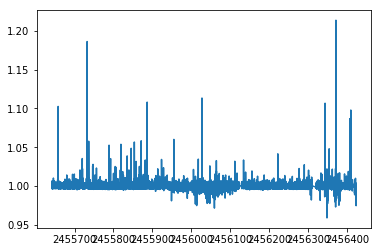

In [10]:
plt.plot(t, f)